In [151]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants as c

#Graphing constants
pagewidth = (8.5,5)
colours = ['#540D6E', '#EE4266', '#FFD23F', '#3BCEAC', '#0EAD69']


In [256]:
''' Finds the error based on manual specified accuracy. 
'''
def find_error(x, percent, reading):
    value = x * percent + reading
    return (round(value, -int(np.floor(np.log10(value)))))

def w_to_f(wavelength):
    return c.c/(wavelength*10**(-9))

def linear(x, a, b):
    return 1/c.e * (a * x + b)

def linear2(x, b):
    return c.h/c.e * x + b

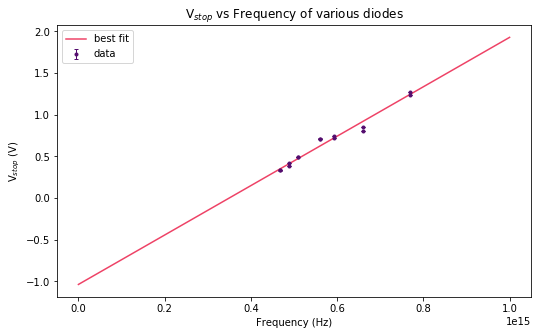

In [258]:
data = np.loadtxt('data/dataset.txt', skiprows=1, usecols=(0,2))
new_data = np.array([(w_to_f(point[0]), point[1]) for point in data])
u = np.array([find_error(item, 0.001, 0.001) for item in new_data[:,1]])

popt, pcov = curve_fit(linear, new_data[:,0], new_data[:,1], sigma=u)
popt2, pcov2 = curve_fit(linear2, new_data[:,0], new_data[:,1], sigma=u)

plt.figure(figsize=pagewidth)
plt.errorbar(new_data[:,0], new_data[:,1], yerr=u, elinewidth=1.0, capthick=1.0, capsize=2.0, fmt='.', 
             color=colours[0], label='data')
space = np.linspace(0, 10**15, 1000)
#space = np.linspace(new_data[0,0], new_data[-1,0], 1000)
plt.plot(space, linear(space, popt[0], popt[1]), color=colours[1], label='best fit')
#plt.plot(space, linear2(space, popt2), color=colours[2], label='actual fit')
plt.xlabel('Frequency (Hz)')
plt.ylabel('V$_{stop}$ (V)')
plt.title('V$_{stop}$ vs Frequency of various diodes')
plt.legend()
plt.savefig('graphs/vvf.png', bbox_inches='tight')

In [252]:
w_f0 = -popt[1]
u_w_f0 = np.sqrt(pcov[1,1])

#f0 = w_f0 / c.h
f0 = w_f0 / popt[0]
uf0 = f0 * np.sqrt(pcov[0,0]/popt[0]**2 + (u_w_f0/w_f0)**2)

print('h=', c.h,'\n', popt[0], np.sqrt(pcov[0,0]))
print('w_f0=', w_f0, u_w_f0)
print('eV w_f0=', w_f0/c.e, u_w_f0/c.e)
print('f0=', f0, uf0)

w_f02 = -popt2
u_w_f02 = np.sqrt(pcov2)

print('w_f0, actual=', w_f02, u_w_f02)

h= 6.62607004e-34 
 4.751237114406455e-34 2.0401635751416624e-35
w_f0= 1.6603329355446556e-19 1.0882402837692657e-20
eV w_f0= 1.0362983169206506 0.06792261662299658
f0= 349452762631079.8 27381941653969.066
w_f0, actual= [1.65339607] [[0.02779681]]


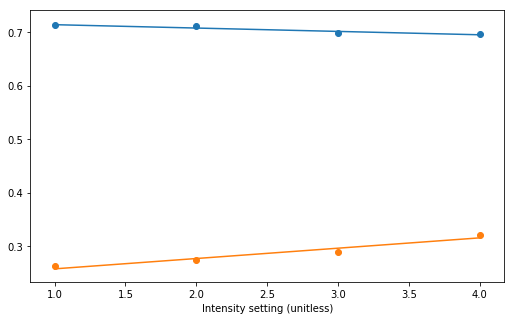

In [270]:
data2 = np.loadtxt('data/data2.txt', skiprows=1)
u2 = np.array([(find_error(item[2], 0.001, 0.001), find_error(item[3], 0.0007, 10**(-9))) for item in data2])

popt3, pcov3 = curve_fit(linear, data2[:,0], data2[:,2])
popt4, pcov4 = curve_fit(linear, data2[:,0], data2[:,3])

mean_v = np.mean(data2[:,2])
mean_c = np.mean(data2[:,3])

plt.figure(figsize=pagewidth)
space = np.linspace(data2[0,0], data2[-1,0], 1000)
plt.plot(space, linear(space, popt3[0], popt3[1]))
plt.plot(space, linear(space, popt4[0], popt4[1]))
plt.scatter(data2[:,0], data2[:,2])
plt.scatter(data2[:,0], data2[:,3])
plt.xlabel('Intensity setting (unitless)')
plt.ylabel('')
plt.savefig('graphs/vcvi.png', bbox_inches='tight')

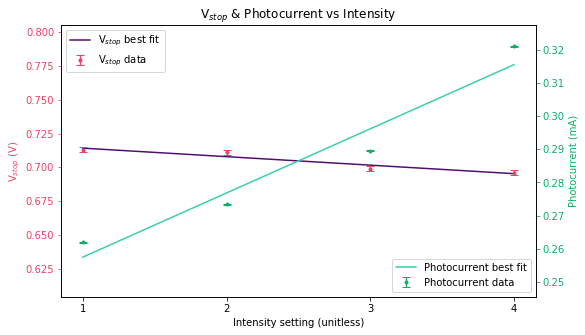

In [279]:
fig, ax1 = plt.subplots()
fig.set_size_inches(pagewidth)

ax1.plot(space, linear(space, popt3[0], popt3[1]), color=colours[0], label='V$_{stop}$ best fit')
ax1.errorbar(data2[:,0], data2[:,2], yerr=u2[:,0], elinewidth=1.4, capthick=1.0, capsize=4.0, fmt='.', 
             color=colours[1], label='V$_{stop}$ data')
ax1.set_ylabel('V$_{stop}$ (V)', color=colours[1])
ax1.tick_params('y', colors=colours[1])
ax1.set_ylim((mean_v-mean_v/7,mean_v+mean_v/7))

ax2 = ax1.twinx()
ax2.plot(space, linear(space, popt4[0], popt4[1]), color=colours[3], label='Photocurrent best fit')
ax2.errorbar(data2[:,0], data2[:,3], yerr=u2[:,1], elinewidth=1.4, capthick=1.0, capsize=4.0, fmt='.', 
             color=colours[4], label='Photocurrent data')
ax2.set_ylabel('Photocurrent (mA)', color=colours[4])
ax2.tick_params('y', colors=colours[4])
ax2.set_ylim((mean_c-mean_c/7,mean_c+mean_c/7))

ax1.set_xlabel('Intensity setting (unitless)')
ax1.set_xticks((1,2,3,4))

ax1.set_title('V$_{stop}$ & Photocurrent vs Intensity')
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.savefig('graphs/combined.png', bbox_inches='tight')

In [ ]:
'''
total potential 524 mV
196.768827 = 524/e
time difference = 156.0micro s
'''

In [200]:
p_e = 60*10**(-3) * (0.3*10**(-9))**2 / (3.23*10**-4)

print(p_e)

t = w_f0 / p_e
print(t)

1.671826625386997e-17
0.009584889601044025


In [ ]:
'''
Manuals located at 
HP 3465A Digital Multimeter (used for Photocurrent)
https://literature.cdn.keysight.com/litweb/pdf/03465-90003.pdf?id=619876
DCA Accuracy +- 0.07% of reading + 0.01% range (10 micro A)

Fluke 8000A Digital Multimeter (used for stopping Voltage)
https://www.avionteq.com/Document/Fluke-8000A-specification-sheet.pdf
DCV Accuracy +- 0.1% of reading + 1 digit
'''